In [49]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from tensorflow .keras import layers,models
from sklearn.metrics import classification_report

In [50]:
(X_train, y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [51]:
len(X_train)

60000

In [52]:
X_train[0].shape

(28, 28)

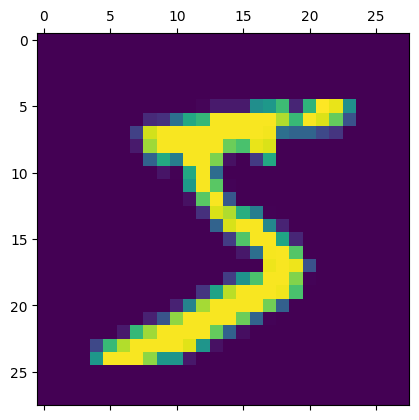

In [53]:
#显示第一张图片
plt.matshow(X_train[0])

In [54]:
y_train[0]

np.uint8(5)

In [55]:
y_test[0]

np.uint8(7)

In [56]:
X_train=X_train/255
X_test=X_test/255

In [57]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [58]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [59]:
cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(100,activation='relu'),
    layers.Dense(10,activation='softmax')
])

/workspaces/keras-exercise/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9083 - loss: 0.3079
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9832 - loss: 0.0550
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9882 - loss: 0.0369
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9922 - loss: 0.0239
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9954 - loss: 0.0144


In [61]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9806 - loss: 0.0608


[0.04602162539958954, 0.9847000241279602]

In [62]:
y_pred=cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [63]:
y_pred[:10]

array([[3.1505198e-11, 6.5307580e-07, 4.1817496e-09, 5.3963145e-06,
        1.7403121e-13, 9.7328745e-10, 7.8091382e-17, 9.9999398e-01,
        5.1430713e-09, 1.6132425e-08],
       [2.4026794e-10, 1.1092235e-06, 9.9999887e-01, 2.3951569e-10,
        9.3626414e-15, 4.2108036e-11, 1.3340469e-10, 1.3402831e-13,
        4.8464416e-10, 3.3280315e-13],
       [1.7489340e-07, 9.9998707e-01, 4.2287266e-07, 4.6414299e-09,
        3.2671726e-06, 6.7637404e-07, 8.6976243e-08, 6.9355483e-06,
        1.1122388e-06, 1.7041566e-07],
       [9.9999219e-01, 2.1780375e-09, 5.9386020e-06, 1.9240675e-08,
        1.2109726e-10, 2.3586399e-08, 1.2934812e-06, 2.9798252e-07,
        1.3771327e-07, 1.2255289e-08],
       [2.6049034e-07, 9.4203853e-07, 1.5442089e-06, 9.4317034e-09,
        9.9887693e-01, 2.6096236e-10, 2.2659997e-07, 9.3430785e-08,
        1.1906825e-06, 1.1187136e-03],
       [4.9262283e-08, 9.9997514e-01, 4.8804022e-08, 3.5328844e-09,
        3.8730681e-07, 2.4862317e-08, 1.5031535e-09, 2.32

In [64]:
#定义预测值数组
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:10]

[np.int64(7),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(4),
 np.int64(9),
 np.int64(6),
 np.int64(9)]

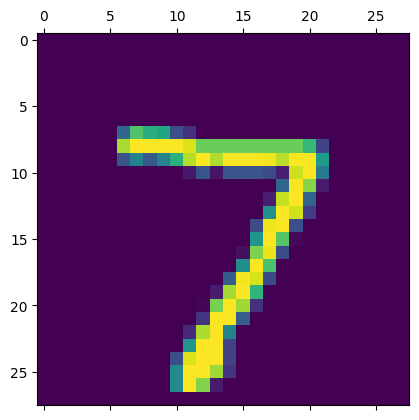

In [65]:
plt.matshow(X_test[0])

In [66]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [67]:

print("Classification Report: \n",classification_report(y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       1.00      0.98      0.99       982
           5       0.98      0.97      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

